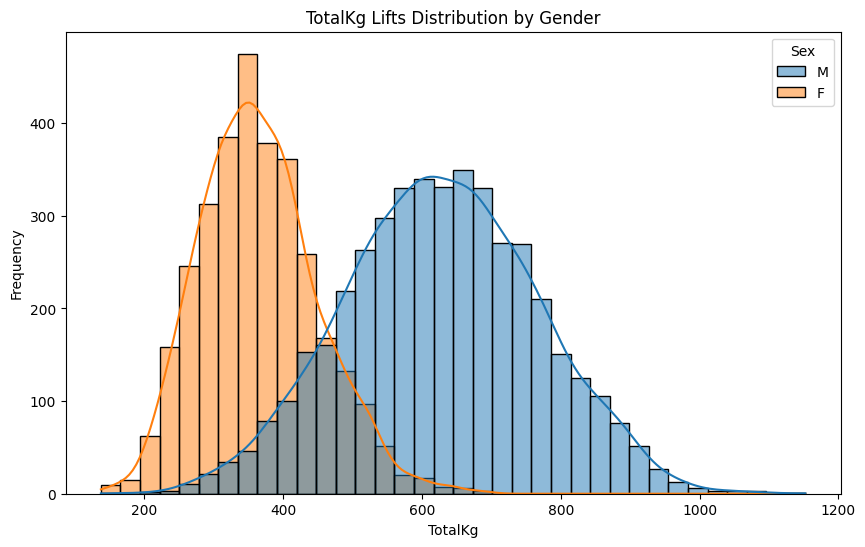

Independent Samples T-Test Results:
T-statistic: 94.79492392841424
P-value: 0.0
Result: There is a significant difference in lifting results between men and women


In [2]:
# "men lift more than women" compare "TotalKg" lifts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data filtering 
filtered_df = df[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]

# Remove NaN values from the 'TotalKg' column
filtered_df = filtered_df.dropna(subset=['TotalKg'])

# Perform statistical analysis based on gender
men = filtered_df[filtered_df['Sex'] == 'M']['TotalKg']
women = filtered_df[filtered_df['Sex'] == 'F']['TotalKg']

# Visualize sample data distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='TotalKg', hue='Sex', kde=True)
plt.title('TotalKg Lifts Distribution by Gender')
plt.xlabel('TotalKg')
plt.ylabel('Frequency')
plt.show()

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(men, women)

# Display t-test results
print("Independent Samples T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Result: There is a significant difference in lifting results between men and women")
else:
    print("Result: There is no significant difference between men and women lifting results. Fail to reject the null hypothesis.")

    # Explanation on the data below: 
    # t_stat is measuring the difference between the means of the two groups relative to
    # the variability within the groups. TLDR: A larger t-statistic means a greater difference between groups.
    # p_value is calculating that the null hypothesis is true based on data. 
    # A smaller p-value equals stronger evidence against the null hypothesis. 
    # Based on the obtained results you can compare it to a pre-defined significance level (0.05 is used most often)
    # If the p-value is less than 0.05, you fail to reject the null hypothesis. In that case there is no significant difference between the means of the two groups.
    # The data shows clearly that men do indeed lift more than women in total kgs.


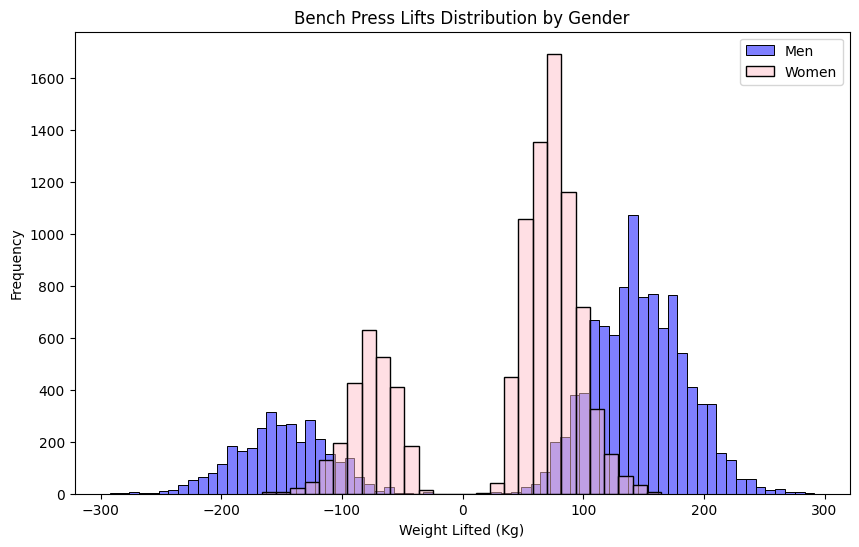

Independent Samples T-Test Results:
T-statistic: 27.229273704605625
P-value: 1.0046487637524433e-160
Result: There is a significant difference in lifting results between men and women


In [8]:
# "men lift more in bench press than women"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data filtering 
filtered_df = df[(df['Event'] == 'SBD') & (df['Equipment'] == 'Raw') & (df['Federation'] == 'IPF')]

# Remove NaN values from the 'BenchKg' columns
filtered_df = filtered_df[(filtered_df[['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg']]).any(axis=1)]
#Axis=1 means that there should be a result in at least one of those filtered listings

# Select bench press lift columns for men and women
bench_press_men = filtered_df[filtered_df['Sex'] == 'M'][['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg']]
bench_press_women = filtered_df[filtered_df['Sex'] == 'F'][['Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg']]

# Concatenate bench press data for all attempts for men and women
bench_press_men = bench_press_men.stack()
bench_press_women = bench_press_women.stack()

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(bench_press_men, color='blue', alpha=0.5, label='Men')
sns.histplot(bench_press_women, color='pink', alpha=0.5, label='Women')
plt.title('Bench Press Lifts Distribution by Gender')
plt.xlabel('Weight Lifted (Kg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(bench_press_men, bench_press_women)

# Display t-test results
print("Independent Samples T-Test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Result: There is a significant difference in lifting results between men and women")
else:
    print("Result: There is no significant difference between men and women lifting results. Fail to reject the null hypothesis.")

    #Explanation is same as in the first analysis above. You can also see that men fail in larger kilograms (negative results).

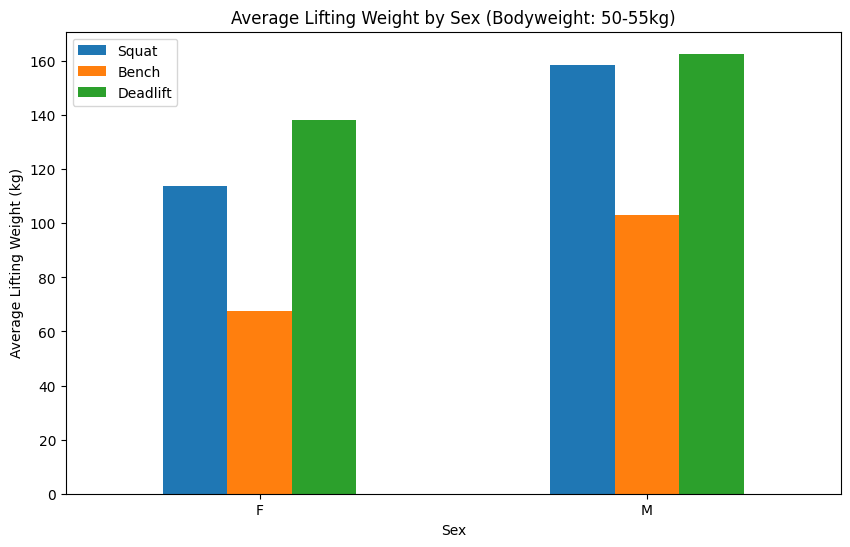

Squat - T-statistic: 11.92149857876524 P-value: 5.340411956709703e-29
Bench - T-statistic: 14.390906276966547 P-value: 1.6331902506967464e-39
Deadlift - T-statistic: 7.321437679962823 P-value: 9.947843463137954e-13


In [5]:
#- "men lift more than women when bodyweight is 50-55kg"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data Filtering
filtered_df = df[(df['Event'] == 'SBD') & 
                 (df['Equipment'] == 'Raw') & 
                 (df['Federation'] == 'IPF') & 
                 (df['BodyweightKg'] >= 50) & 
                 (df['BodyweightKg'] <= 55)]

# Group data by sex and calculate mean lifting weight for each sex
avg_lifting_weight = filtered_df.groupby('Sex')[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].mean()

# Create a bar plot
avg_lifting_weight.plot(kind='bar', figsize=(10, 6))
plt.title('Average Lifting Weight by Sex (Bodyweight: 50-55kg)')
plt.xlabel('Sex')
plt.ylabel('Average Lifting Weight (kg)')
plt.xticks(rotation=0)
plt.legend(['Squat', 'Bench', 'Deadlift'])
plt.show()

# Perform t-test for each lift (squat, bench, deadlift), same as above

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3SquatKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3SquatKg'].dropna())
print("Squat - T-statistic:", t_stat, "P-value:", p_value)

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3BenchKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3BenchKg'].dropna())
print("Bench - T-statistic:", t_stat, "P-value:", p_value)

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3DeadliftKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3DeadliftKg'].dropna())
print("Deadlift - T-statistic:", t_stat, "P-value:", p_value)


# Explanation on data below: Based on these results we can conclude that men lift more than women in bench presses, and there is a trend towards
# Men lifting more in squats, although it seems that the differences are way smaller in this weight group.

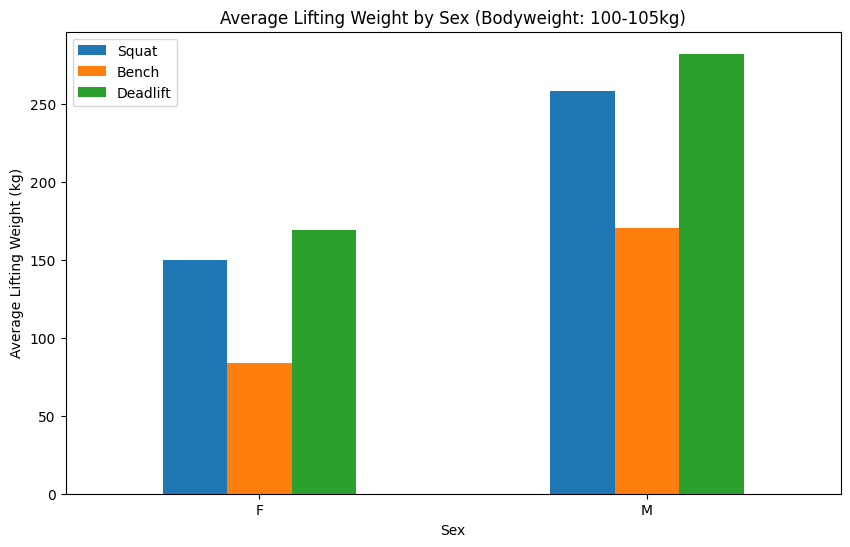

Squat - T-statistic: 16.534210224425863 P-value: 1.4366524936241642e-50
Bench - T-statistic: 21.022600454097656 P-value: 2.144996555751448e-73
Deadlift - T-statistic: 17.658219894658806 P-value: 3.7954178996415326e-56


In [7]:
#- "men lift more than women when bodyweight is 100-105kg"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data Filtering
filtered_df = df[(df['Event'] == 'SBD') & 
                 (df['Equipment'] == 'Raw') & 
                 (df['Federation'] == 'IPF') & 
                 (df['BodyweightKg'] >= 100) & 
                 (df['BodyweightKg'] <= 105)]

# Group data by sex and calculate mean lifting weight for each sex
avg_lifting_weight = filtered_df.groupby('Sex')[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].mean()

# Create a bar plot
avg_lifting_weight.plot(kind='bar', figsize=(10, 6))
plt.title('Average Lifting Weight by Sex (Bodyweight: 100-105kg)')
plt.xlabel('Sex')
plt.ylabel('Average Lifting Weight (kg)')
plt.xticks(rotation=0)
plt.legend(['Squat', 'Bench', 'Deadlift'])
plt.show()

# Perform t-test for each lift (squat, bench, deadlift), same as above

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3SquatKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3SquatKg'].dropna())
print("Squat - T-statistic:", t_stat, "P-value:", p_value)

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3BenchKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3BenchKg'].dropna())
print("Bench - T-statistic:", t_stat, "P-value:", p_value)

t_stat, p_value = ttest_ind(filtered_df[filtered_df['Sex'] == 'M']['Best3DeadliftKg'].dropna(), 
                             filtered_df[filtered_df['Sex'] == 'F']['Best3DeadliftKg'].dropna())
print("Deadlift - T-statistic:", t_stat, "P-value:", p_value)

# Explanation of data: Men lift more than women in all categories: Squat, Bench, Deadlift when weight is 100-105kg.
# Differences between men and women raise whenever the competitor weights more.  

T-statistic: 10.136160492506606
P-value: 4.6187643777201696e-24


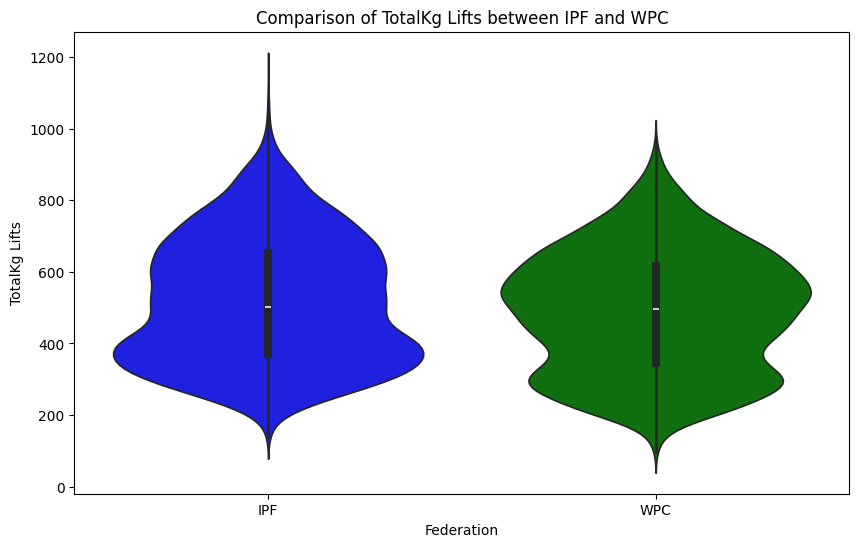

In [2]:
#- "men lift more in IPF than in WPC" compare "TotalKg" lifts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Filter data for IPF and WPC federations
ipf_df = df[(df['Event'] == 'SBD') & 
            (df['Equipment'] == 'Raw') & 
            (df['Federation'] == 'IPF')]

wpc_df = df[(df['Event'] == 'SBD') & 
            (df['Equipment'] == 'Raw') & 
            (df['Federation'] == 'WPC')]

# Calculate TotalKg lifts for each federation
ipf_total_kg = ipf_df['TotalKg']
wpc_total_kg = wpc_df['TotalKg']

# Drop missing values from IPF and WPC TotalKg lifts data
ipf_total_kg = ipf_total_kg.dropna()
wpc_total_kg = wpc_total_kg.dropna()

# Concatenate IPF and WPC data into a single Dataframe
ipf_wpc_df = pd.concat([ipf_df.assign(Federation='IPF'), wpc_df.assign(Federation='WPC')])

# Perform t-test
t_stat, p_value = ttest_ind(ipf_total_kg, wpc_total_kg)

# Print t-statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Data visualization using Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Federation', y='TotalKg', hue='Federation', data=ipf_wpc_df, palette=["blue", "green"], legend=False)
plt.xlabel('Federation')
plt.ylabel('TotalKg Lifts')
plt.title('Comparison of TotalKg Lifts between IPF and WPC')
plt.show()

# Explanation of data below: 
# Based on the results of the t-test and low p-value we can conclude that athletes in the IPF federation tend to have significantly higher
# TotalKG lifts than WPC federation. Data visualization also supports this statement. The most clear visualization style in this case was the Violin Plot.




                 Country     TotalKg
31                Guyana  847.500000
0                Algeria  717.863636
11              Bulgaria  716.869565
59                 Nauru  711.323529
88   Trinidad and Tobago  707.125000
..                   ...         ...
32             Hong Kong  348.750000
96                Uganda  342.500000
15                 China  307.500000
100                Wales  262.500000
41           Ivory Coast         NaN

[102 rows x 2 columns]


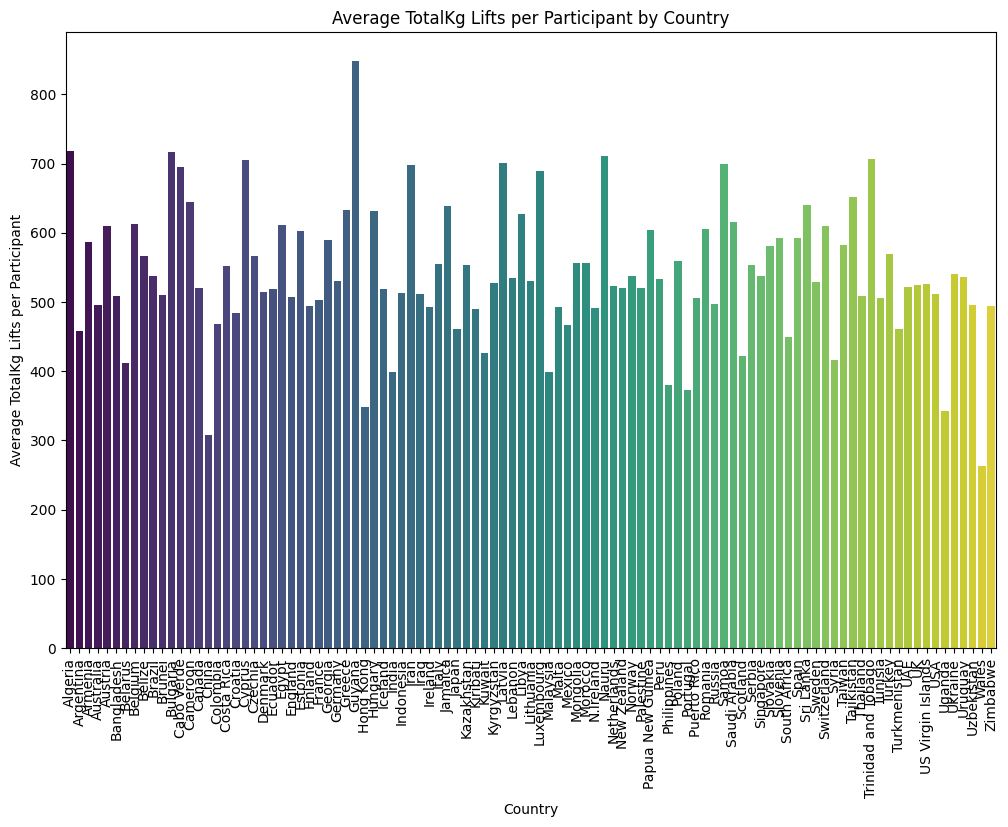

In [9]:
#- "Lifter country affect to TotalKg"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv("openpowerlifting-2023-08-12-9f1b3427.csv", low_memory=False)

# Data Filtering
filtered_df = df[(df['Event'] == 'SBD') & 
                 (df['Equipment'] == 'Raw') & 
                 (df['Federation'] == 'IPF')]

# Group the data by country and mean number
country_avg_totals = filtered_df.groupby('Country')['TotalKg'].mean().reset_index()

#Sort in descending order
country_avg_totals_sorted = country_avg_totals.sort_values(by='TotalKg', ascending=False)
print(country_avg_totals_sorted)

# Drop rows with NaN values in the 'TotalKg' column
country_avg_totals_sorted = country_avg_totals.dropna(subset=['TotalKg'])

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=country_avg_totals_sorted, x='Country', y='TotalKg', hue='Country', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average TotalKg Lifts per Participant')
plt.title('Average TotalKg Lifts per Participant by Country')
plt.show()


